### 4.4. Stacking regressor

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [
    ("lmr", lmr),
    ("rfr", rfr),
    ("gbr", gbr),
]

# ser :  Stacking Regressor Ensemble
sre = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
sre.fit(X_train, y_train)

StackingRegressor(estimators=[('lmr',
                               Pipeline(steps=[('preprocessor',
                                                ColumnTransformer(remainder='passthrough',
                                                                  transformers=[('num',
                                                                                 Pipeline(steps=[('imputer',
                                                                                                  SimpleImputer(strategy='median')),
                                                                                                 ('poly_int',
                                                                                                  PolynomialFeatures(include_bias=False)),
                                                                                                 ('scaler',
                                                                                                  StandardScaler())]),
                                                                                 ['mileage',
                                                                                  'reg_code',
                                                                                  'standard_colour',
                                                                                  'standard_make',
                                                                                  'standard_model',
                                                                                  'v...
                                                                                  'fuel_type_petrol',
                                                                                  'fuel_type_petrol_hybrid',
                                                                                  'fuel_type_petrol_plug_in_hybrid',
                                                                                  'age']),
                                                                                ('cat',
                                                                                 Pipeline(steps=[('imputer',
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('ohe',
                                                                                                  OneHotEncoder(drop='if_binary',
                                                                                                                handle_unknown='ignore',
                                                                                                                sparse_output=False))]),
                                                                                 [])],
                                                                  verbose_feature_names_out=False)),
                                               ('regr',
                                                GradientBoostingRegressor())]))],
                  final_estimator=RidgeCV())

Three separate base estimators Ridge Linear Regressor, Random Forest Regressor, and Gradient Boosting Regressor are used to generate a Stacking Regressor ensemble. The names of the estimators and their actual objects are the first and second elements of the tuples that make up the estimators list.

By using their outputs to train a final estimator, RidgeCV, the Stacking Regressor combines the predictions from these basic estimators. Making final predictions based on the base estimators' forecasts is the responsibility of the final estimator.

In conclusion, the Ridge Linear Regressor , Random Forest Regressor, and Gradient Boosting Regressor models' predictions are used by the Stacking Regressor ensemble to train the RidgeCV model, which serves as the final estimator.

In [ ]:
# import time
# import matplotlib.pyplot as plt
# from sklearn.metrics import PredictionErrorDisplay
# from sklearn.model_selection import cross_validate, cross_val_predict

# fig, axs = plt.subplots(2, 2, figsize=(9, 7))
# axs = np.ravel(axs)

# for ax, (name, est) in zip(
#     axs, estimators + [("Stacking Regressor", sre)]
# ):
#     scorers = {"R2": "r2", "MAE": "neg_mean_absolute_error"}

#     start_time = time.time()
#     scores = cross_validate(
#         est, X, y, scoring=list(scorers.values()), n_jobs=-1, verbose=0
#     )
#     elapsed_time = time.time() - start_time

#     y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)
#     scores = {
#         key: (
#             f"{np.abs(np.mean(scores[f'test_{value}'])):.2f} +- "
#             f"{np.std(scores[f'test_{value}']):.2f}"
#         )
#         for key, value in scorers.items()
#     }

#     display = PredictionErrorDisplay.from_predictions(
#         y_true=y,
#         y_pred=y_pred,
#         kind="actual_vs_predicted",
#         ax=ax,
#         scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
#         line_kwargs={"color": "tab:red"},
#     )
#     ax.set_title(f"{name}\nEvaluation in {elapsed_time:.2f} seconds")

#     for name, score in scores.items():
#         ax.plot([], [], " ", label=f"{name}: {score}")
#     ax.legend(loc="upper left")

# plt.suptitle("Single predictors versus stacked predictors")
# plt.tight_layout()
# plt.subplots_adjust(top=0.9)
# plt.show()

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


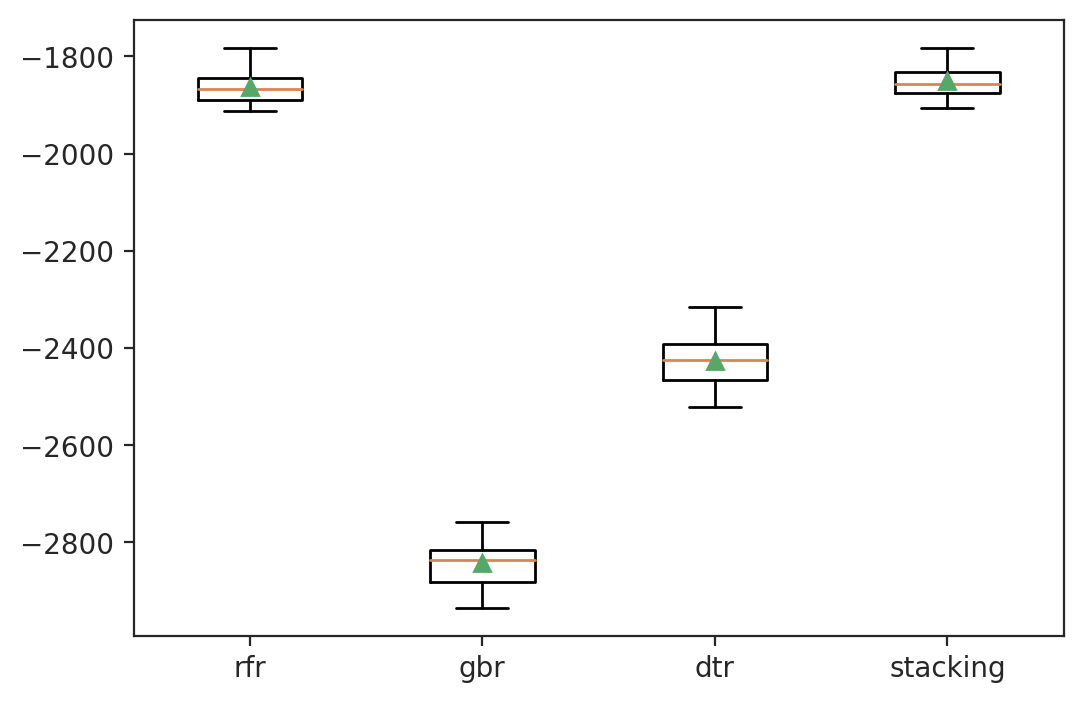

In [ ]:
level0, sr_results, sr_names = list(), list(), list()

level0.append(('rfr', RandomForestRegressor()))
level0.append(('gbr', GradientBoostingRegressor()))
level0.append(('dtr', DecisionTreeRegressor()))

level1 = Ridge()

sr_model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(RandomForestRegressor(), X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

sr_results.append(scores)
sr_names.append('rfr')

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(GradientBoostingRegressor(), X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

sr_results.append(scores)
sr_names.append('gbr')

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(DecisionTreeRegressor(), X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

sr_results.append(scores)
sr_names.append('dtr')

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(sr_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

sr_results.append(scores)
sr_names.append('stacking')

pyplot.boxplot(sr_results, labels=sr_names, showmeans=True)
pyplot.show()

#### Grid search

In [ ]:
np.linspace(1, 5, 5, dtype='int')

array([1, 2, 3, 4, 5])

In [ ]:
grid_parameters = dict(
    regr__alpha=np.logspace(-3, 3, 7),
)

grid = GridSearchCV(
    lmr, grid_parameters, return_train_score=True,
    scoring='neg_root_mean_squared_error'
)

grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly_int',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['mileage',
                                                                          'reg_code',
                                                                          'standard_colour',
                                                                          'standard_make',
                                                                          'standard_model',
                                                                          'vehicle_conditi...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         [])],
                                                          verbose_feature_names_out=False)),
                                       ('regr', Ridge())]),
             param_grid={'regr__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
grid_results = pd.DataFrame(grid.cv_results_)

grid_results[
    [ 'param_regr__alpha', 'mean_test_score', 'std_test_score',
      'mean_train_score', 'std_train_score', 'rank_test_score' ]
].sort_values('rank_test_score').rename(
    columns=dict(
        param_regr__alpha='alpha'
    )
)

,alpha,mean_test_score,std_test_score,mean_train_score,std_train_score,rank_test_score
4,10.0,-5425.942936,77.398597,-5387.207288,17.884494,1
3,1.0,-5425.957886,78.299435,-5384.296665,18.225736,2
1,0.01,-5426.333452,79.442413,-5383.523901,18.374641,3
0,0.001,-5426.395593,79.669109,-5383.509449,18.381040,4
2,0.1,-5426.617030,78.952288,-5383.755721,18.311061,5
5,100.0,-5460.480375,79.054797,-5424.781086,17.683569,6
6,1000.0,-5658.505792,78.477783,-5628.579560,18.427953,7


For the Ridge Linear Regressor, the provided code conducts a grid search with cross-validation to determine the ideal regularisation parameter alpha value. The GridSearchCV class is used to carry out the grid search.

The grid search is carried out by the grid.fit(X_train, y_train) line, which also fits the model with various alpha values and cross-validates the results. The grid search results are then displayed in a tabular format, with each alpha value's mean test scores, standard deviations of those scores, mean train scores, and train score standard deviations all displayed. The ranking of each alpha value according to the test results is shown in the "rank_test_score" column, with a rank of 1 denoting the best-performing alpha value and in my case it is 0.001.
